## Exploratory Data Analysis in Python

**Course Structure:**
* Chapter 1. Getting to Know a Dataset
* Chapter 2. Data Cleaning and Imputation
* Chapter 3. Relations in Data
* Chapter 4. Turning Exploratory Analysis Into Action

### CHAPTER 1. Getting to Know a Dataset

#### Part 1.1 Initial exploration

**Exploratory Data Analysis (EDA):**
* The process of **reviewing and cleaning data** to **derive insights** and **generate hypothesis** 
* Prepare data for use in a machine learning model
* Use *'.head()'* to get a first look at the data
* Use *'.info()'* to gather more information
* Use *'.value_counts()'* to look at categorical columns
* Use *'.describe()'* to look at numerical columns
* Use *'seaborn'* and *'matplotlib.pyplot'* library to visualize data

In [1]:
# Code for part 1.1

# functions for initial exploration
import pandas as pd

# get the data
unemployment = pd.read_csv('12_datasets/clean_unemployment.csv')

# print the first five rows
print(unemployment.head())

# print summary of non-missing values and data types
print(unemployment.info())

# print summary statistics for numerical columns
print(unemployment.describe())

# count the values associated with each continent
print(unemployment['continent'].value_counts())


  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  D

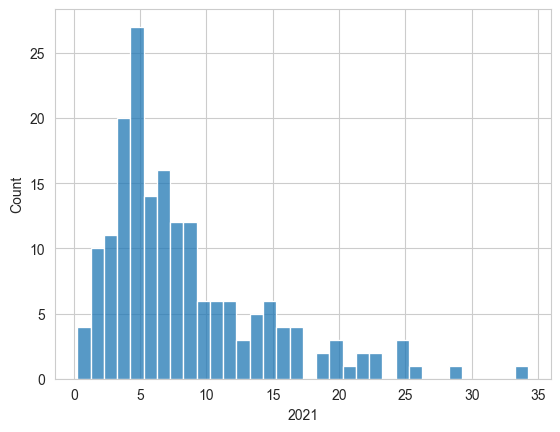

In [2]:
# Code for part 1.1 (continue)

# global unemployment in 2021
import seaborn as sns
import matplotlib.pyplot as plt

# create a histogram of 2021 unemployment
sns.histplot(data=unemployment, x="2021",binwidth=1)
plt.show()


#### Part 1.2 Data validation

* An early step in EDA
* Verify whether **data types and ranges** are as expected
* Use *'.dtypes'* to look at data types
* Use *'.astype()'* to change data types
* Use *'.isin()'* to validate categorical data
* Use *'.min(), .max()'* and *sns.boxplot()* to validate numerical data

In [3]:
# Code for part 1.2

# get the data
import pandas as pd
unemployment = pd.read_csv('12_datasets/clean_unemployment.csv')

# detecting data types
print(unemployment.dtypes)

# validating continents whether it is outside Oceania
not_oceania = ~unemployment['continent'].isin(['Oceania'])
print(unemployment[not_oceania])


country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object
    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
17

0.26 33.56


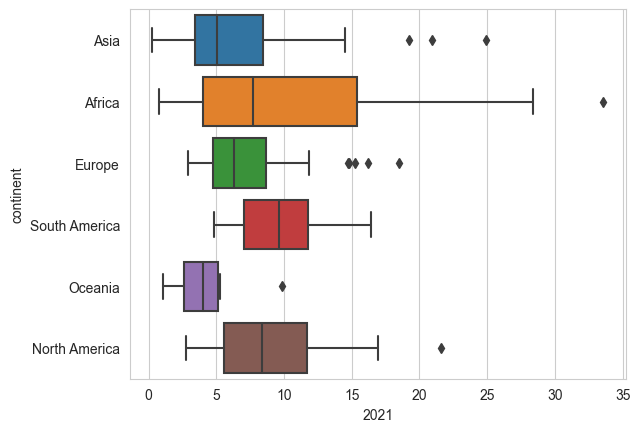

In [4]:
# Code for part 1.2 (continue)

# validating range
import seaborn as sns
import matplotlib.pyplot as plt

# print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x="2021", y="continent")
plt.show()

#### Part 1.3 Data summarization

* Use *'.groupby()'* to explore groups of data
* And use chained aggregated functions to summarize grouped data
* Aggregating functions:
    * Sum: *'.sum()'*
    * Count: *'.count()'*
    * Minimum: *'.min()'*
    * Maximum: *'.max()'*
    * Variance: *'.var()'*
    * Standard deviation: *'.std()'*
* Use *'.agg()'* applies aggregating functions across a DataFrame (ungrouped data)
* You can even **specify aggregations for columns** and **name summary columns**
* Use *'sns.barplot()'* to visualize categorical summaries

In [6]:
# Code for part 1.3

# summaries with .groupby() and .agg()
import pandas as pd

# get the data
unemployment = pd.read_csv('12_datasets/clean_unemployment.csv')

# print the mean and standard deviation of rates by year
print(unemployment.agg(['mean', 'std']))

# print the mean and standard deviation of rates by year by each continent
print(unemployment.groupby('continent').agg(['mean', 'std']))

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  
                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721

/var/folders/fs/gp7d8vz934q38kytf13746540000gn/T/ipykernel_2039/2546980553.py:10: FutureWarning: ['country_code', 'country_name', 'continent'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.agg(['mean', 'std']))
/var/folders/fs/gp7d8vz934q38kytf13746540000gn/T/ipykernel_2039/2546980553.py:13: FutureWarning: ['country_code', 'country_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.groupby('continent').agg(['mean', 'std']))


In [7]:
# Code for part 1.3 (continue)

# named aggregations
continent_summary = unemployment.groupby('continent').agg(
    mean_rate_2021 = ('2021', 'mean'),
    std_rate_2021 = ('2021', 'std')
)
print(continent_summary)


               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


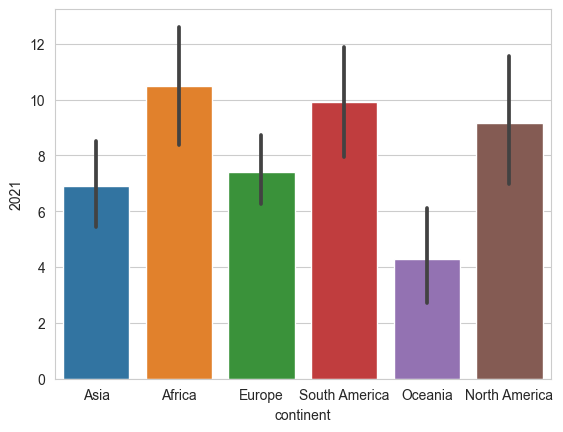

In [8]:
# Code for part 1.3 (continue)

# visualize categorical summaries
import seaborn as sns
import matplotlib.pyplot as plt

# create a bar plot of continent and their average unemployment rate
sns.barplot(data=unemployment, x='continent', y='2021')
plt.show()

### CHAPTER 2. Data Cleaning and Imputation

#### Part 2.1 Addressing missing data

**Missing data a problem?**
* Affects distributions
* Less representative of the population
* Can result in draw wrong conclusions
* Use *'.isna().sum()'* to check missing data in a DataFrame

**Dealing with missing data:**
1. Drop missing values (when 5% or less of total values)
    * Use *'.dropna()'* to drop missing values
2. Impute mean, median, mode (depends on distribution and context)
    * Use *'.fillna()'* to impute missing values
3. Impute by subgroup
    * Use *'.fillna(.map())'* to configure the mapping strategy in subgroups

In [12]:
# Code for part 2.1

# dealing with missing data
import pandas as pd

# get the data
planes = pd.read_csv('12_datasets/planes.csv')
# print(planes.head())

# print number of missing values in each column
print(planes.isna().sum())

# find threshold (5%)
threshold = len(planes) * 0.05

# create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
# print(cols_to_drop)

# drop missing values with filter
planes.dropna(subset=cols_to_drop, inplace=True)
print(planes.isna().sum())


Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


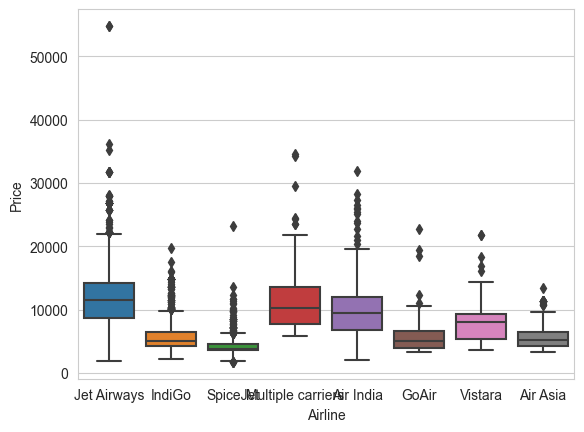

In [14]:
# Code for part 2.1 (continue)

# strategies for remaining missing data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check 'Additional_Info' column
print(planes['Additional_Info'].value_counts())

# check 'Price' column
sns.boxplot(data=planes, x='Airline', y='Price')
plt.show()

# we can remove 'Additional_Info' column and impute 'Price' column with subgroup median

In [17]:
# Code for part 2.1 (continue)

# drop 'Additional_Info' column
planes.dropna(subset=['Additional_Info'], inplace=True)

# imputing missing plane prices
airline_prices = planes.groupby('Airline')['Price'].median()

# convert to a dictionary
prices_dict = airline_prices.to_dict()

# map the dictionary to missing values
planes['Price'] = planes['Price'].fillna(planes['Airline'].map(prices_dict))

# check for missing values (again)
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64
